In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

In [2]:
boston = load_boston()

In [3]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['Price'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
y = df.Price
x = df.drop('Price',axis=1)

In [5]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [6]:
len(x)

506

In [7]:
 x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .2, random_state = 77)

In [8]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

404
102
404
102


In [9]:
linreg = LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [10]:

coeff_df = pd.DataFrame(linreg.coef_, x.columns, columns=['Coefficient'])
coeff_df
# y= (-.1041)CRIM + (.048031)ZN+......+ (-.558082)LSTAT + 39.02

,Coefficient
CRIM,-0.104127
ZN,0.048031
INDUS,-0.011906
CHAS,3.064590
NOX,-19.885375
RM,3.811223
AGE,0.005227
DIS,-1.614652
RAD,0.332615
TAX,-0.012847


In [11]:
linreg.intercept_

39.024802910932486

In [12]:
train_score = linreg.score(x_train, y_train)
test_score = linreg.score(x_test, y_test)
print(train_score)
print(test_score)

0.7398204023122792
0.7269774874059811


In [13]:
predicted = linreg.predict(x_test)

In [14]:
df_pred = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
df_pred

,Actual,Predicted
313,21.6,25.921594
139,17.8,16.100737
314,23.8,25.784393
89,28.7,31.468418
87,22.2,26.442077
...,...,...
136,17.4,15.524589
151,19.6,17.840441
177,24.6,29.830597
379,10.2,16.943577


In [15]:
from sklearn import metrics
metrics.mean_squared_error(y_test, predicted)

18.929248330112937

In [16]:
metrics.mean_absolute_error(y_test,predicted)

3.369900904881236

In [17]:
np.sqrt(metrics.mean_squared_error(y_test, predicted))

4.350775600983455

In [18]:
rr = Ridge()
rr.fit(x_train, y_train)

Ridge()

In [19]:
rr100 = Ridge(alpha=100) 
rr100.fit(x_train,y_train)

Ridge(alpha=100)

In [20]:
ridge_train_score = rr.score(x_train, y_train)
ridge_test_score = rr.score(x_test, y_test)
ridge100_train_score = rr100.score(x_train, y_train)
ridge100_test_score = rr100.score(x_test, y_test)

In [21]:
predicted_ridge = rr100.predict(x_test)
predicted_ridge = pd.DataFrame({'Actual': y_test, 'Predicted':predicted_ridge})
predicted_ridge

,Actual,Predicted
313,21.6,26.862535
139,17.8,15.410713
314,23.8,26.099423
89,28.7,30.920117
87,22.2,26.520679
...,...,...
136,17.4,15.558216
151,19.6,23.877787
177,24.6,30.645282
379,10.2,15.996422


In [22]:
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", ridge_train_score)
print("ridge regression test score low alpha:", ridge_test_score)
print("ridge regression train score high alpha:", ridge100_train_score)
print("ridge regression test score high alpha:", ridge100_test_score)

linear regression train score: 0.7398204023122792
linear regression test score: 0.7269774874059811
ridge regression train score low alpha: 0.7370295674009033
ridge regression test score low alpha: 0.7306005477249631
ridge regression train score high alpha: 0.7127107311732339
ridge regression test score high alpha: 0.7117154080482151


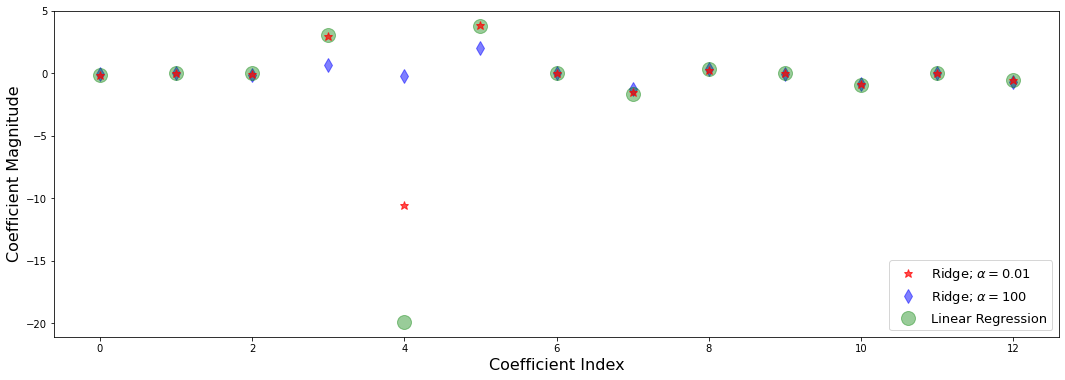

In [23]:
fig = plt.figure(facecolor='w',figsize=(18, 6))
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=9,\
         color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7)
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=10,\
         color='blue',label=r'Ridge; $\alpha = 100$')
plt.plot(linreg.coef_,alpha=0.4,linestyle='none',marker='o',markersize=14,\
         color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()